In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
# arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
# Import libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
target = "num_sold"
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')
test['date'] = pd.to_datetime(test['date'])
test = test.set_index('date')
features = [c for c in train.columns if c not in [target, "id"]]
# country = Argentina store=Kaggle Learn	product=Using LLMs to Improve Your Coding	
tmp = train[(train['country'] == 'Argentina') & (train['store'] == 'Kaggle Learn') & (train['product'] == 'Using LLMs to Improve Your Coding')]
train.head()

,id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,49


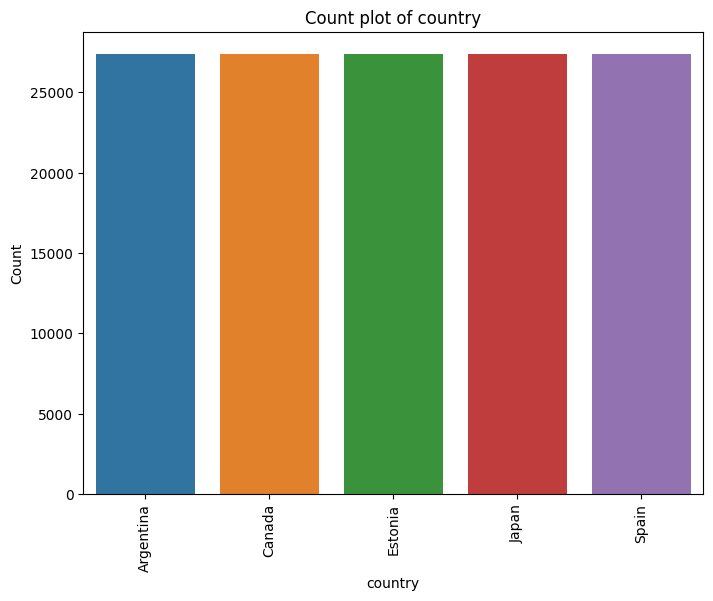

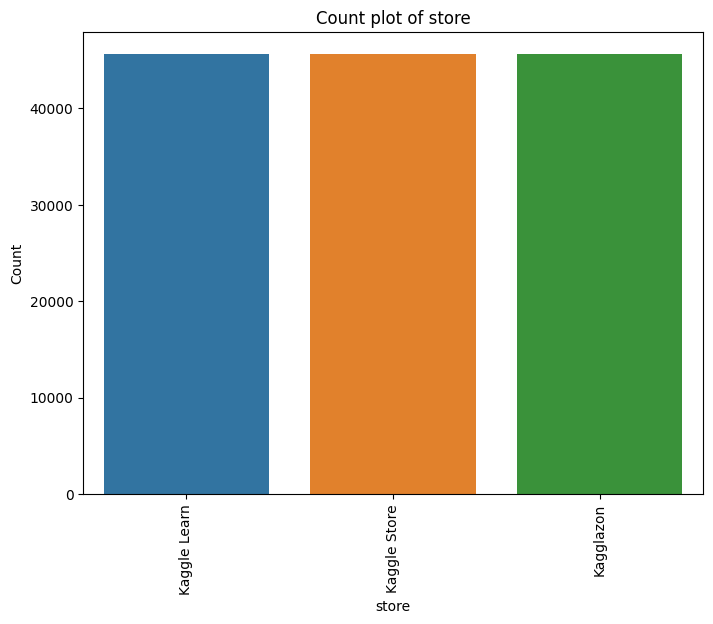

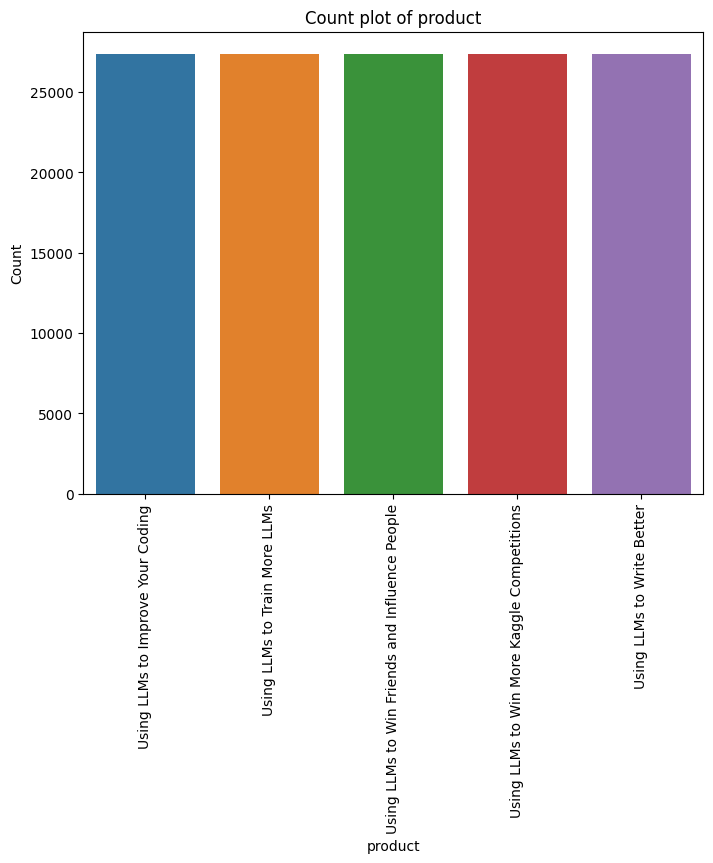

In [3]:
# count plot for features other than date
for c in features:
  
    # create a figure and an axis
    fig, ax = plt.subplots(figsize=(8, 6))
    # plot the count of each category in the feature column
    sns.countplot(x=c, data=train, ax=ax)
    # set the title and the labels
    ax.set_title(f"Count plot of {c}")
    ax.set_xlabel(c)
    ax.set_ylabel("Count")
    # rotate the xticks for better visibility
    plt.xticks(rotation=90)
    # show the plot
    plt.show()

In [ ]:
# Plot target variable over time
plt.figure(figsize=(12,6))
plt.plot(tmp[target], label='Train')
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# Plot target variable by country, store and product
fig, ax = plt.subplots(3, 1, figsize=(12,18))
sns.boxplot(x='country', y=target, data=train, ax=ax[0])
sns.boxplot(x='store', y=target, data=train, ax=ax[1])
sns.boxplot(x='product', y=target, data=train, ax=ax[2])
ax[0].set_title('Sales by country')
ax[1].set_title('Sales by store')
ax[2].set_title('Sales by product')
plt.tight_layout()
plt.show()

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())
sns.boxplot(train[target])
plt.title('Outliers in target variable')
plt.show()

In [ ]:
# resample the data to get the yearly sales
yearly_sales = tmp.resample('Y')[target].sum().reset_index()
# rename the columns
yearly_sales.columns = ['Year', 'Sales']
# plot the yearly sales
sns.barplot(x='Year', y='Sales', data=yearly_sales)
plt.title('Yearly Sales')
plt.xticks(rotation=50)
plt.show()

# resample the data to get the monthly sales
monthly_sales = tmp.resample('M')[target].sum().reset_index()
# rename the columns
monthly_sales.columns = ['Month', 'Sales']
# plot the monthly sales
sns.barplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# group the data by month and calculate the mean sales for each month
monthly_sales = tmp.groupby(tmp.index.month)[target].mean().reset_index()
# rename the columns
monthly_sales.columns = ['Month', 'Sales']
# create a dictionary to map month numbers to month names
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
              7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
# map the month numbers to month names
monthly_sales['Month'] = monthly_sales['Month'].map(month_dict)
# plot the average monthly sales for all years
sns.barplot(x='Month', y='Sales', data=monthly_sales, order=list(month_dict.values()))
plt.title('Average Monthly Sales for All Years')
plt.show()


In [ ]:
# december sales for all days
dec_sales = tmp[tmp.index.month == 12]
# group the data by day and calculate the mean sales for each day

dec_sales = dec_sales.groupby(dec_sales.index.day)[target].mean().reset_index()

#plot
plt.figure(figsize=(12,6))
sns.barplot(x='date', y=target, data=dec_sales)


In [ ]:
# weekly sales for all days
week_days = tmp.groupby(tmp.index.dayofweek)[target].mean().reset_index()
#plor
plt.figure(figsize=(12,6))
sns.barplot(x='date', y=target, data=week_days)

In [ ]:
# train time and test tine
print("Train time: ", train.index.min(), train.index.max())
print("Test time: ", test.index.min(), test.index.max())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(tmp[target], model='additive', period=360
                           )
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(22,10))
ax[0].set_title('Observed values for Sales', fontsize=16)
ax[0].plot(decom.observed)
ax[1].set_title('Trend', fontsize=16)
ax[1].plot(decom.trend)
ax[2].set_title('Seasonality', fontsize=16)
ax[2].plot(decom.seasonal)
ax[3].set_title('Residuals', fontsize=16)
ax[3].plot(decom.resid)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tmp[target].diff().dropna(), lags=20,)
plot_pacf(tmp[target].diff().dropna(), lags=20,)
plt.show()


In [ ]:
import numpy as np
# Import libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)



# Define model parameters
p = 7
d = 1
q = 3

# Create time series split object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store errors
mae_list = []
smape_list = []

# Loop over each split
for train_index, test_index in tscv.split(tmp):
    # Get train and test sets
    train_ = tmp.iloc[train_index]
    test_ = tmp.iloc[test_index]

    # Fit ARIMA model on train set
    model = ARIMA(train_[target], order=(p, d, q),freq='D')
    model_fit = model.fit()

    # Print model summary
    # print(model_fit.summary())

    # Forecast on test set
    forecast = model_fit.predict(start=test_.index[0], end=test_.index[-1])

    # Calculate mean absolute error
    mae = mean_absolute_error(test_[target], forecast)
    print(f"Mean absolute error: {mae}")

    # Append to mae list
    mae_list.append(mae)

    # Calculate SMAPE
    smape_value = smape(test_[target], forecast)
    print(f"Symmetric mean absolute percentage error: {smape_value}")

    # Append to smape list
    smape_list.append(smape_value)

# Print average of errors
print(f"Average of mean absolute error: {np.mean(mae_list)}")
print(f"Average of symmetric mean absolute percentage error: {np.mean(smape_list)}")


In [ ]:
# Define model parameters
p = 7
d = 1
q = 3
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)



# Initialize lists to store errors
mae_list = []
smape_list = []

# Initialize test_pred DataFrame
test_pred = pd.DataFrame(columns=['id', 'prediction'])

# Loop over unique combinations of country, store, and product
for country, store, product in train[['country', 'store', 'product']].drop_duplicates().values:
    # Filter data for current combination of country, store, and product
    tmp_train = train[(train['country'] == country) & (train['store'] == store) & (train['product'] == product)]
    tmp_test = test[(test['country'] == country) & (test['store'] == store) & (test['product'] == product)]

    # Fit ARIMA model on entire training data for current combination of country, store, and product
    model = ARIMA(tmp_train[target], order=(p, d, q),freq='D')
    model_fit = model.fit()

    # Forecast on test data for current combination of country, store, and product
    forecast = model_fit.predict(start=tmp_test.index[0], end=tmp_test.index[-1])

    # # Calculate mean absolute error
    # mae = mean_absolute_error(tmp_train[target], forecast)
    # print(f"Mean absolute error: {mae}")

    # # Append to mae list
    # mae_list.append(mae)

    # # Calculate SMAPE
    # smape_value = smape(tmp_train[target], forecast)
    # print(f"Symmetric mean absolute percentage error: {smape_value}")

    # # Append to smape list
    # smape_list.append(smape_value)

    # Append test predictions to test_pred DataFrame
    test_pred = pd.concat([test_pred, pd.DataFrame({'id': tmp_test['id'], 'prediction': forecast})], ignore_index=True)

# Print average of errors
# print(f"Average of mean absolute error: {np.mean(mae_list)}")
# print(f"Average of symmetric mean absolute percentage error: {np.mean(smape_list)}")


In [ ]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

In [ ]:
test_pred.rename(columns={'prediction': 'num_sold'}, inplace=True)
test_pred.to_csv('data/submission.csv', index=False)
competition_name = "playground-series-s3e19"
msg = "ARIMA"
!kaggle competitions submit -c {competition_name} -f data/submission.csv -m "{msg}"

In [4]:
df = pd.concat([train, test])
# Function to create lag and window-based features
def create_features(group):
    group = group.copy()
    group.sort_values('date', inplace=True)
    
    # Lag feature for the previous 7 days
    # for i in range(1, 2):
    #     group[f'lag_{i}'] = group['num_sold'].shift(i)

    # Rolling window features for the previous 7 days
    # group['rolling_mean_7d'] = group['num_sold'].shift().rolling(window=7, min_periods=1).mean()
    # group['rolling_std_7d'] = group['num_sold'].shift().rolling(window=7, min_periods=1).std()
    # group['rolling_min_7d'] = group['num_sold'].shift().rolling(window=7, min_periods=1).min()
    # group['rolling_max_7d'] = group['num_sold'].shift().rolling(window=7, min_periods=1).max()

    # Expanding window features
    # group['expanding_mean'] = group['num_sold'].expanding().mean()
    # group['expanding_std'] = group['num_sold'].expanding().std()
    # group['expanding_min'] = group['num_sold'].expanding().min()
    # group['expanding_max'] = group['num_sold'].expanding().max()
    
    return group


# Apply the function to each group
df = df.groupby(['country', 'store', 'product']).apply(create_features)

# set date from index as index
df.set_index(df.index.get_level_values(3), inplace=True)
# Feature for last 5 days of December
# df['is_last_5_days_dec'] = ((df.index.month == 12) & (df.index.day > 25)).astype(int)

# # Features for Saturday and Sunday
# df['is_saturday'] = (df.index.dayofweek == 5).astype(int)
# df['is_sunday'] = (df.index.dayofweek == 6).astype(int)
# df['is_friday'] = (df.index.dayofweek == 4).astype(int)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekdays'] = df.index.dayofweek
# Weekly seasonality
df['month_sin'] = np.sin(2*np.pi*df.month/12)
df['month_cos'] = np.cos(2*np.pi*df.index.month/12)
df['day_sin'] = np.sin(2*np.pi*df.index.day/30)
df['day_cos'] = np.cos(2*np.pi*df.index.day/30)

df.head()


,id,country,store,product,num_sold,year,month,day,weekdays,month_sin,month_cos,day_sin,day_cos
date,,,,,,,,,,,,,
2017-01-01,10,Argentina,Kagglazon,Using LLMs to Improve Your Coding,340.0,2017,1,1,6,0.5,0.866025,0.207912,0.978148
2017-01-02,85,Argentina,Kagglazon,Using LLMs to Improve Your Coding,250.0,2017,1,2,0,0.5,0.866025,0.406737,0.913545
2017-01-03,160,Argentina,Kagglazon,Using LLMs to Improve Your Coding,267.0,2017,1,3,1,0.5,0.866025,0.587785,0.809017
2017-01-04,235,Argentina,Kagglazon,Using LLMs to Improve Your Coding,236.0,2017,1,4,2,0.5,0.866025,0.743145,0.669131
2017-01-05,310,Argentina,Kagglazon,Using LLMs to Improve Your Coding,247.0,2017,1,5,3,0.5,0.866025,0.866025,0.500000


In [5]:
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + np.finfo(float).eps))

In [6]:

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Label encode categorical features
categorical_features = ['country', 'store', 'product']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

df.head()


,id,country,store,product,num_sold,year,month,day,weekdays,month_sin,month_cos,day_sin,day_cos
date,,,,,,,,,,,,,
2017-01-01,10,0,0,0,340.0,2017,1,1,6,0.5,0.866025,0.207912,0.978148
2017-01-02,85,0,0,0,250.0,2017,1,2,0,0.5,0.866025,0.406737,0.913545
2017-01-03,160,0,0,0,267.0,2017,1,3,1,0.5,0.866025,0.587785,0.809017
2017-01-04,235,0,0,0,236.0,2017,1,4,2,0.5,0.866025,0.743145,0.669131
2017-01-05,310,0,0,0,247.0,2017,1,5,3,0.5,0.866025,0.866025,0.500000


In [7]:
# Separate target variable and feature variables
y = df['num_sold']
X = df.drop(['id', 'num_sold'], axis=1)

# Deal with missing values introduced by lag features
X.fillna(method='ffill', inplace=True)

X.head(), y.head()


(            country  store  product  year  month  day  weekdays  month_sin  \
 date                                                                         
 2017-01-01        0      0        0  2017      1    1         6        0.5   
 2017-01-02        0      0        0  2017      1    2         0        0.5   
 2017-01-03        0      0        0  2017      1    3         1        0.5   
 2017-01-04        0      0        0  2017      1    4         2        0.5   
 2017-01-05        0      0        0  2017      1    5         3        0.5   
 
             month_cos   day_sin   day_cos  
 date                                       
 2017-01-01   0.866025  0.207912  0.978148  
 2017-01-02   0.866025  0.406737  0.913545  
 2017-01-03   0.866025  0.587785  0.809017  
 2017-01-04   0.866025  0.743145  0.669131  
 2017-01-05   0.866025  0.866025  0.500000  ,
 date
 2017-01-01    340.0
 2017-01-02    250.0
 2017-01-03    267.0
 2017-01-04    236.0
 2017-01-05    247.0
 Name: num_sold, d

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor

# Drop 'date' from the feature variables
# X.drop('date', axis=1, inplace=True)

# Initialize the LightGBM model
model = LGBMRegressor(random_state=2021, n_jobs=-1)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Placeholder for the SMAPE scores
smape_scores = []
# select train based off date, train last date 2021-12-31. date is object date
X.index = pd.to_datetime(X.index)
X_train = X[X.index <= pd.to_datetime('2021-12-31')]
X_test = X[X.index > pd.to_datetime('2021-12-31')]
y_train = y[X.index <= pd.to_datetime('2021-12-31')]
y_test = y[X.index > pd.to_datetime('2021-12-31')]
X_valid = X_train[X_train.index > pd.to_datetime('2020-12-31')]
y_valid = y_train[X_train.index > pd.to_datetime('2020-12-31')]
X_train = X_train[X_train.index <= pd.to_datetime('2020-12-31')]
# select y_train upto length of X_train
y_train = y_train[:len(X_train)]

model = model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=100, verbose=100)
y_pred = model.predict(X_valid)
smape_score = smape(y_valid, y_pred)
print("Smape score: ", smape_score)

/home/studio-lab-user/.conda/envs/stat/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/studio-lab-user/.conda/envs/stat/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 64081.5
Smape score:  82.78670444547025


In [9]:
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
import optuna
import warnings
warnings.filterwarnings('ignore')
# Drop 'date' from the feature variables
# X.drop('date', axis=1, inplace=True)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Placeholder for the SMAPE scores
smape_scores = []
# select train based off date, train last date 2021-12-31. date is object date
X.index = pd.to_datetime(X.index)
X_train = X[X.index <= pd.to_datetime('2021-12-31')]
X_test = X[X.index > pd.to_datetime('2021-12-31')]
y_train = y[X.index <= pd.to_datetime('2021-12-31')]
y_test = y[X.index > pd.to_datetime('2021-12-31')]
X_valid = X_train[X_train.index > pd.to_datetime('2020-12-31')]
y_valid = y_train[X_train.index > pd.to_datetime('2020-12-31')]
X_train = X_train[X_train.index <= pd.to_datetime('2020-12-31')]
# select y_train upto length of X_train
y_train = y_train[:len(X_train)]

# Define an objective function for Optuna
def objective(trial):
    # Sample hyperparameters from different distributions
    n_estimators = trial.suggest_int("n_estimators", 100, 2000)
    num_leaves = trial.suggest_int("num_leaves", 2, 64)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    
    # Initialize the LightGBM model with the sampled hyperparameters
    model = LGBMRegressor(n_estimators=n_estimators, num_leaves=num_leaves, learning_rate=learning_rate, subsample=subsample, colsample_bytree=colsample_bytree, random_state=2021, n_jobs=-1)
    
    # Train the model and get the predictions on the validation set
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=100, verbose=False)
    y_pred = model.predict(X_valid)
    
    # Calculate and return the SMAPE score
    smape_score = smape(y_valid, y_pred)
    return smape_score

# Create a study object with minimization direction
study = optuna.create_study(direction="minimize")

# Run 100 trials of hyperparameter optimization
study.optimize(objective, n_trials=25)

# Print the best hyperparameters and the best SMAPE score
print("Best hyperparameters: ", study.best_params)
print("Best SMAPE score: ", study.best_value)


/home/studio-lab-user/.conda/envs/stat/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-07-31 11:38:16,328] A new study created in memory with name: no-name-a8df6cd4-4644-4933-a8aa-b9b174baff30
[I 2023-07-31 11:38:16,730] Trial 0 finished with value: 83.4636316365848 and parameters: {'n_estimators': 1539, 'num_leaves': 5, 'learning_rate': 0.09705193554541923, 'subsample': 0.8648940784011006, 'colsample_bytree': 0.9597930582861093}. Best is trial 0 with value: 83.4636316365848.
[I 2023-07-31 11:38:17,181] Trial 1 finished with value: 83.32922208168523 and parameters: {'n_estimators': 922, 'num_leaves': 11, 'learning_rate': 0.040852934266266086, 'subsample': 0.9713604740971237, 'colsample_bytree': 0.6362378055987208}. Best is trial 1 with value: 83.32922208168523.
[I 2023-07-31 11:38:17,932] Trial 

Best hyperparameters:  {'n_estimators': 1894, 'num_leaves': 3, 'learning_rate': 0.05564903456333561, 'subsample': 0.9321064296216841, 'colsample_bytree': 0.5721890525019597}
Best SMAPE score:  80.48953109210208


In [ ]:
X_test

In [10]:
# train model on whole dataset
best_params = {'n_estimators': 1894, 'num_leaves': 3, 'learning_rate': 0.05564903456333561, 'subsample': 0.9321064296216841, 'colsample_bytree': 0.5721890525019597}
X_train = X[X.index <= pd.to_datetime('2021-12-31')]
y_train = y[X.index <= pd.to_datetime('2021-12-31')]
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
test_pred = pd.DataFrame({'id': test['id'], 'num_sold': test_pred})
test_pred.head()

,id,num_sold
date,,
2022-01-01,136950,256.789284
2022-01-01,136951,279.285606
2022-01-01,136952,224.987794
2022-01-01,136953,225.557530
2022-01-01,136954,226.150497


In [11]:
test_pred.to_csv('data/submission.csv', index=False)
competition_name = "playground-series-s3e19"
msg = "LIGHTGBM WITH OPTUNA"
!kaggle competitions submit -c {competition_name} -f data/submission.csv -m "{msg}"

100%|█████████████████████████████████████████| 680k/680k [00:01<00:00, 657kB/s]
Successfully submitted to Forecasting Mini-Course Sales

In [ ]:
# plot test_pred
plt.figure(figsize=(12,6))
plt.plot(test_pred['num_sold'], label='Test')